## About Dataset


### Context
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

### Data Description</br>
**7043 observations with 33 variables** 

**CustomerID:** A unique ID that identifies each customer.

**Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country:** The country of the customer’s primary residence.

**State:** The state of the customer’s primary residence.

**City:** The city of the customer’s primary residence.

**Zip Code:** The zip code of the customer’s primary residence.

**Lat Long:** The combined latitude and longitude of the customer’s primary residence.

**Latitude:** The latitude of the customer’s primary residence.

**Longitude:** The longitude of the customer’s primary residence.

**Gender:** The customer’s gender: Male, Female

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicate if the customer has a partner: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_theme(style= 'darkgrid')

In [3]:
customer_churn = pd.read_excel('Telco_customer_churn.xlsx')

In [ ]:
customer_churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
customer_churn.sample(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
3195,5377-NDTOU,1,United States,California,San Pedro,90732,"33.744119, -118.31448",33.744119,-118.314480,Female,...,Two year,No,Mailed check,91.05,6293.75,No,0,39,4644,NaN
371,6240-EURKS,1,United States,California,Plymouth,95669,"38.489273, -120.891614",38.489273,-120.891614,Female,...,Month-to-month,Yes,Electronic check,35.00,553,Yes,1,76,2649,Competitor offered more data
5015,8818-DOPVL,1,United States,California,El Cerrito,94530,"37.924838, -122.289145",37.924838,-122.289145,Female,...,Month-to-month,Yes,Electronic check,104.45,4863.85,No,0,76,4103,NaN
5344,4007-NHVHI,1,United States,California,Rio Linda,95673,"38.688764, -121.457596",38.688764,-121.457596,Female,...,Month-to-month,Yes,Electronic check,96.85,5219.65,No,0,57,5679,NaN
1294,3669-LVWZB,1,United States,California,Tahoma,96142,"39.061227, -120.179546",39.061227,-120.179546,Male,...,Month-to-month,Yes,Mailed check,51.00,305.95,Yes,1,86,4630,Long distance charges


In [6]:
customer_churn.columns = customer_churn.columns.str.lower().str.replace(' ', '_')

In [ ]:
customer_churn.sample(5)

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
1961,1091-SOZGA,1,United States,California,La Palma,90623,"33.850504, -118.039892",33.850504,-118.039892,Female,...,One year,Yes,Credit card (automatic),99.80,5515.45,No,0,43,4606,NaN
3988,3617-XLSGQ,1,United States,California,Modesto,95355,"37.672906, -120.946594",37.672906,-120.946594,Female,...,Two year,No,Bank transfer (automatic),109.25,7082.5,No,0,28,5865,NaN
1886,6865-JZNKO,1,United States,California,Los Angeles,90027,"34.127194, -118.295647",34.127194,-118.295647,Female,...,Month-to-month,Yes,Bank transfer (automatic),55.30,1530.6,No,0,65,2725,NaN
1967,3930-ZGWVE,1,United States,California,Stanton,90680,"33.801869, -117.995068",33.801869,-117.995068,Male,...,Month-to-month,No,Mailed check,19.75,19.75,No,0,68,2484,NaN
1586,3727-RJMEO,1,United States,California,Rohnert Park,94928,"38.34719, -122.697822",38.347190,-122.697822,Male,...,Month-to-month,Yes,Electronic check,82.85,460.25,Yes,1,78,4458,Competitor had better devices


In [8]:
customer_churn.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [9]:
customer_churn.shape

(7043, 33)

In [10]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

In [11]:
customer_churn.isnull().sum().value_counts(ascending=False)

0       32
5174     1
Name: count, dtype: int64

In [12]:
customer_churn.isnull().sum()

customerid              0
count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
tenure_months           0
phone_service           0
multiple_lines          0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn_label             0
churn_value             0
churn_score             0
cltv                    0
churn_reason         5174
dtype: int64

In [13]:
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
zip_code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
tenure_months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
monthly_charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
churn_value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
churn_score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
cltv,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


In [14]:
customer_churn.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [15]:
redundants = ['customerid', 'count', 'zip_code', 'lat_long', 'latitude', 'longitude', 'partner', 'dependents', 'churn_label', 'churn_reason']

customer_churn.drop(redundants, axis = 1, inplace=True)

In [16]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            7043 non-null   object 
 1   state              7043 non-null   object 
 2   city               7043 non-null   object 
 3   gender             7043 non-null   object 
 4   senior_citizen     7043 non-null   object 
 5   tenure_months      7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [17]:
remove_charges = customer_churn[customer_churn['total_charges']==' ']
remove_charges

,country,state,city,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,online_security,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
2234,United States,California,San Bernardino,Female,No,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,36,2578
2438,United States,California,Independence,Male,No,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,68,5504
2568,United States,California,San Mateo,Female,No,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,45,2048
2667,United States,California,Cupertino,Male,No,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,48,4950
2856,United States,California,Redcrest,Female,No,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,30,4740
4331,United States,California,Los Angeles,Male,No,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,53,2019
4687,United States,California,Sun City,Male,No,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,49,2299
5104,United States,California,Ben Lomond,Female,No,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,27,3763
5719,United States,California,La Verne,Male,No,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,69,4890
6772,United States,California,Bell,Female,No,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,44,2342


In [18]:
customer_churn.drop(customer_churn[customer_churn['total_charges']==' '].index, inplace=True)

In [19]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            7032 non-null   object 
 1   state              7032 non-null   object 
 2   city               7032 non-null   object 
 3   gender             7032 non-null   object 
 4   senior_citizen     7032 non-null   object 
 5   tenure_months      7032 non-null   int64  
 6   phone_service      7032 non-null   object 
 7   multiple_lines     7032 non-null   object 
 8   internet_service   7032 non-null   object 
 9   online_security    7032 non-null   object 
 10  online_backup      7032 non-null   object 
 11  device_protection  7032 non-null   object 
 12  tech_support       7032 non-null   object 
 13  streaming_tv       7032 non-null   object 
 14  streaming_movies   7032 non-null   object 
 15  contract           7032 non-null   object 
 16  paperless_billing  7032 non-n

In [ ]:
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7032.0,32.421786,24.545260,1.00,9.0000,29.00,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75
churn_value,7032.0,0.265785,0.441782,0.00,0.0000,0.00,1.0000,1.00
churn_score,7032.0,58.715301,21.531321,5.00,40.0000,61.00,75.0000,100.00
cltv,7032.0,4401.445108,1182.414266,2003.00,3469.7500,4527.50,5381.0000,6500.00


In [21]:
# customer_churn['total_charges'].replace(' ', 0, inplace=True)

In [22]:
customer_churn['total_charges'] = customer_churn['total_charges'].astype(float)

In [ ]:
customer_churn.reset_index()

,index,country,state,city,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
0,0,United States,California,Los Angeles,Male,No,2,Yes,No,DSL,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,1,United States,California,Los Angeles,Female,No,2,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,2,United States,California,Los Angeles,Female,No,8,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,3,United States,California,Los Angeles,Female,No,28,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,4,United States,California,Los Angeles,Male,No,49,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,United States,California,Landers,Female,No,72,Yes,No,No,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306
7028,7039,United States,California,Adelanto,Male,No,24,Yes,Yes,DSL,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,2140
7029,7040,United States,California,Amboy,Female,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560
7030,7041,United States,California,Angelus Oaks,Female,No,11,No,No phone service,DSL,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793


In [24]:
categorical_columns = customer_churn.select_dtypes(['object']).columns
numerical_columns = customer_churn.select_dtypes(include=np.number).columns

In [ ]:
customer_churn[categorical_columns]

,country,state,city,gender,senior_citizen,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,United States,California,Los Angeles,Male,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
1,United States,California,Los Angeles,Female,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,United States,California,Los Angeles,Female,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,United States,California,Los Angeles,Female,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,United States,California,Los Angeles,Male,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,United States,California,Landers,Female,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
7039,United States,California,Adelanto,Male,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7040,United States,California,Amboy,Female,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7041,United States,California,Angelus Oaks,Female,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [26]:
customer_churn.head()

,country,state,city,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,online_security,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
0,United States,California,Los Angeles,Male,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,United States,California,Los Angeles,Female,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,United States,California,Los Angeles,Female,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,United States,California,Los Angeles,Female,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,United States,California,Los Angeles,Male,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340


In [ ]:
customer_churn[numerical_columns]

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306
7039,24,84.80,1990.50,0,59,2140
7040,72,103.20,7362.90,0,71,5560
7041,11,29.60,346.45,0,59,2793


In [28]:
categorical_columns

Index(['country', 'state', 'city', 'gender', 'senior_citizen', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method'],
      dtype='object')

In [29]:
numerical_columns

Index(['tenure_months', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv'],
      dtype='object')

In [ ]:
correlation = customer_churn.corr(numeric_only=True)
correlation

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
tenure_months,1.000000,0.246862,0.825880,-0.354049,-0.226379,0.396188
monthly_charges,0.246862,1.000000,0.651065,0.192858,0.133556,0.098565
total_charges,0.825880,0.651065,1.000000,-0.199484,-0.124312,0.341837
churn_value,-0.354049,0.192858,-0.199484,1.000000,0.664970,-0.128253
churn_score,-0.226379,0.133556,-0.124312,0.664970,1.000000,-0.080837
cltv,0.396188,0.098565,0.341837,-0.128253,-0.080837,1.000000


<Axes: >

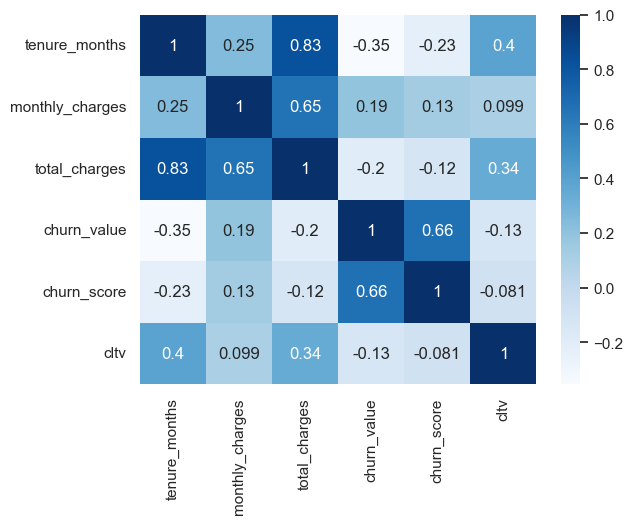

In [31]:
sns.heatmap(correlation, annot=True, cmap="Blues")

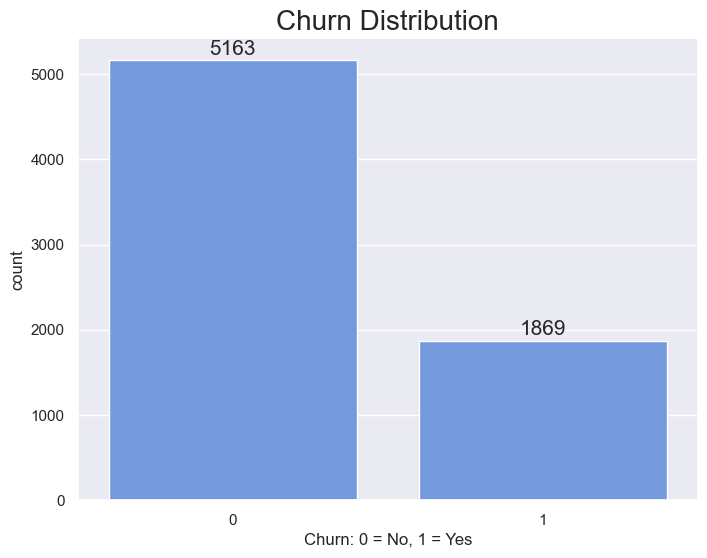

In [32]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x="churn_value", data=customer_churn,color='cornflowerblue')
plt.xlabel('Churn: 0 = No, 1 = Yes')
plt.title('Churn Distribution', size = 20)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points');

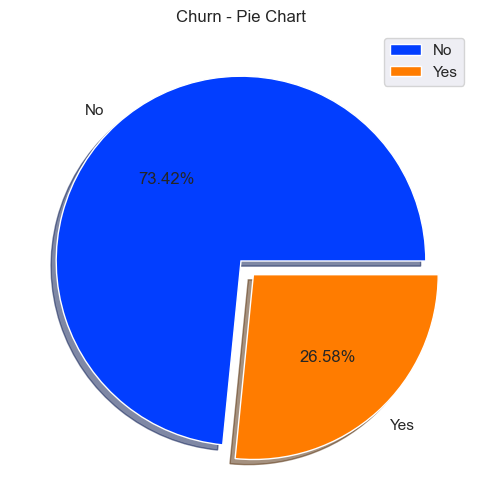

In [33]:
# fig, ax = plt.subplots()
# ax.pie("churn_value", labels=customer_churn, autopct='%1.1f%%')



plt.figure(figsize=(8,6))
explode = [0,0.1]
palette_color = sns.color_palette('bright')
plt.pie(x= customer_churn.churn_value.value_counts(), labels = ['No', 'Yes'], 
        autopct='%1.2f%%', shadow=True, explode = explode, colors=palette_color)
plt.title('Churn - Pie Chart')
plt.legend()
plt.show()



In [34]:
# plt.pie(x="churn_value", data=customer_churn)

In [35]:
customer_churn.churn_value.value_counts()

churn_value
0    5163
1    1869
Name: count, dtype: int64

### ❖	Feature Distribution: </br>
♦	For categorical features (e.g., Contract, PaymentMethod), use bar plots or count plots to visualize how different categories are distributed.</br>
♦	For numerical features (e.g., MonthlyCharges, TotalCharges, Tenure), use histograms or box plots to understand the distribution, central tendency, and any outliers.


In [36]:
customer_churn[categorical_columns]

,country,state,city,gender,senior_citizen,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,United States,California,Los Angeles,Male,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
1,United States,California,Los Angeles,Female,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,United States,California,Los Angeles,Female,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,United States,California,Los Angeles,Female,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,United States,California,Los Angeles,Male,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,United States,California,Landers,Female,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
7039,United States,California,Adelanto,Male,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7040,United States,California,Amboy,Female,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7041,United States,California,Angelus Oaks,Female,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [37]:
customer_churn[numerical_columns]

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306
7039,24,84.80,1990.50,0,59,2140
7040,72,103.20,7362.90,0,71,5560
7041,11,29.60,346.45,0,59,2793


In [38]:
categorical_columns

Index(['country', 'state', 'city', 'gender', 'senior_citizen', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method'],
      dtype='object')

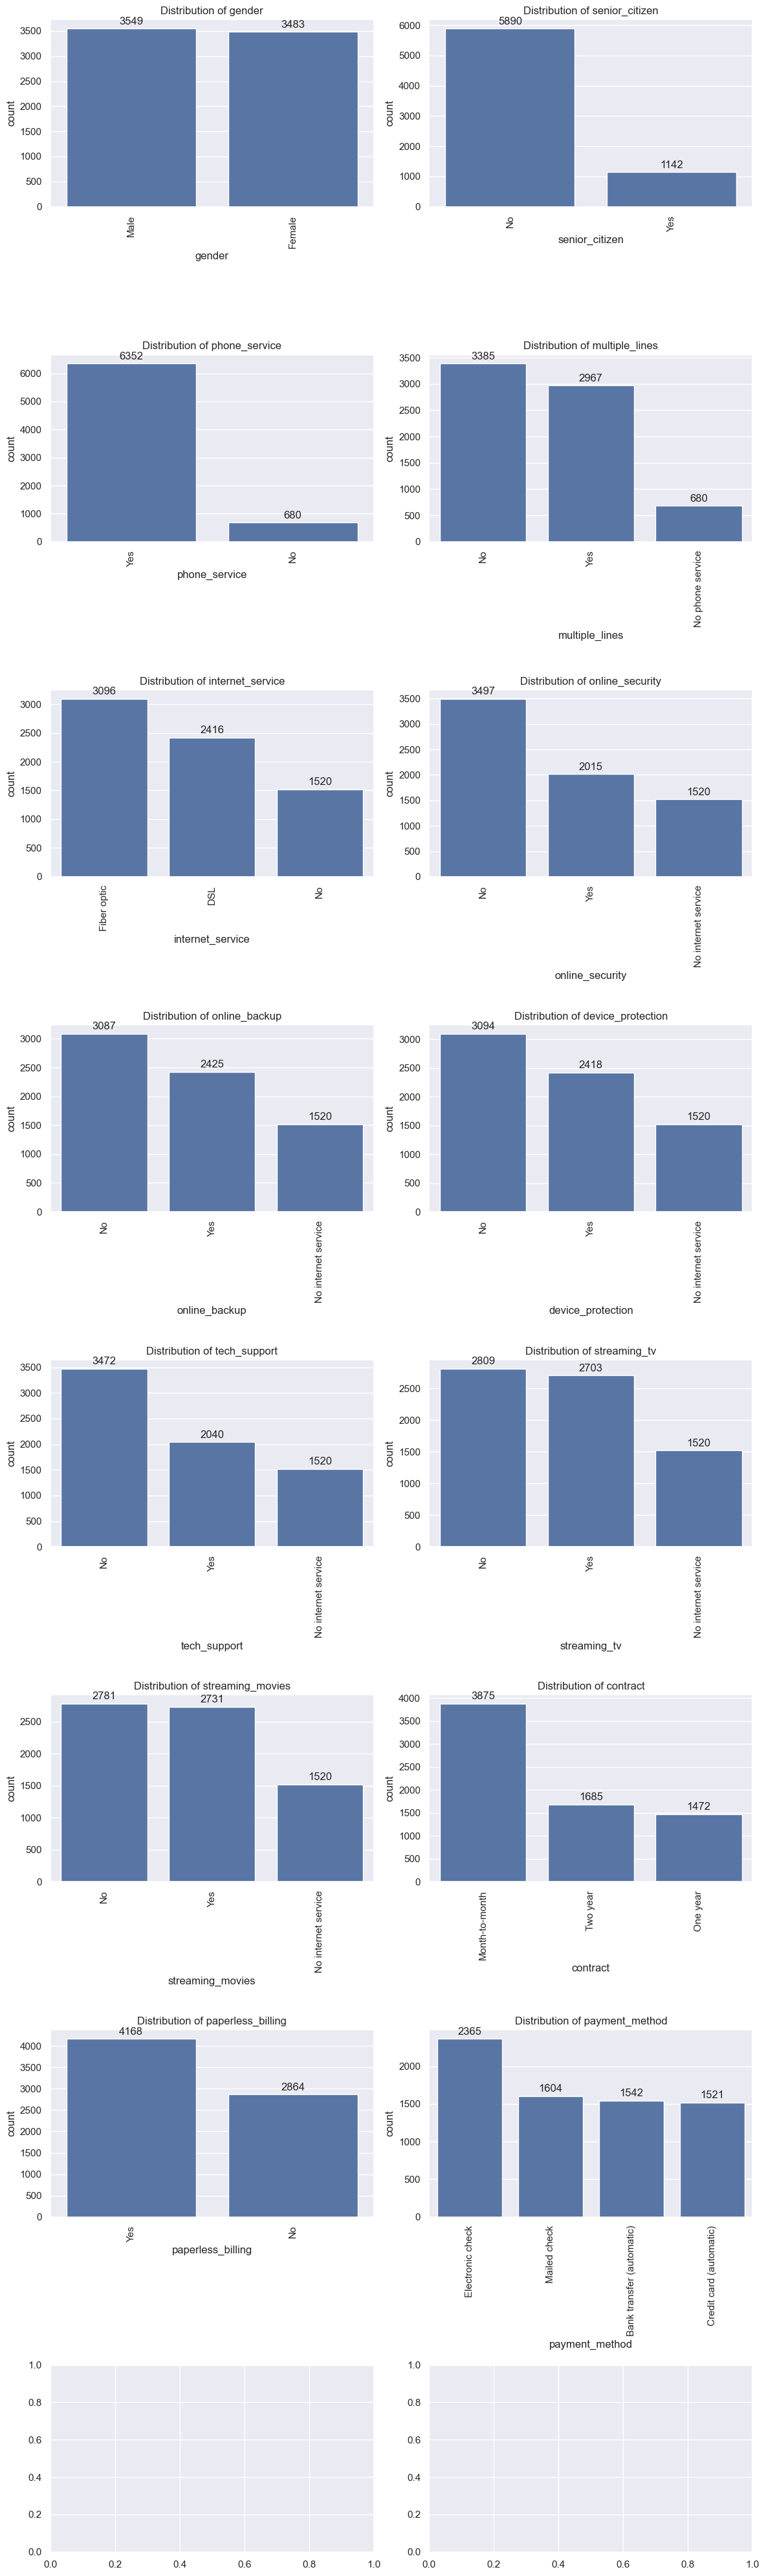

In [39]:
fig, axes = plt.subplots(8, 2, figsize=(12, 40))
for i, col, in enumerate(categorical_columns.drop(['country', 'state', 'city'])):
    ax = axes[i//2, i%2]
    sns.countplot(ax = ax, x = col, data = customer_churn, order = customer_churn[col].value_counts().index)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    for i in ax.patches:
        ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=12, xytext=(0, 8),
                 textcoords='offset points');

plt.tight_layout()
plt.show()

tenure_months 
Skew = 0.23773083190513133


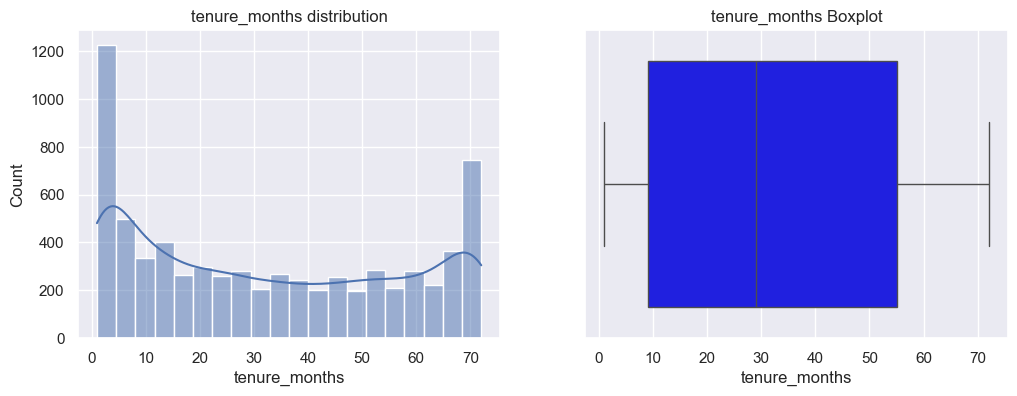

monthly_charges 
Skew = -0.22210292770166232


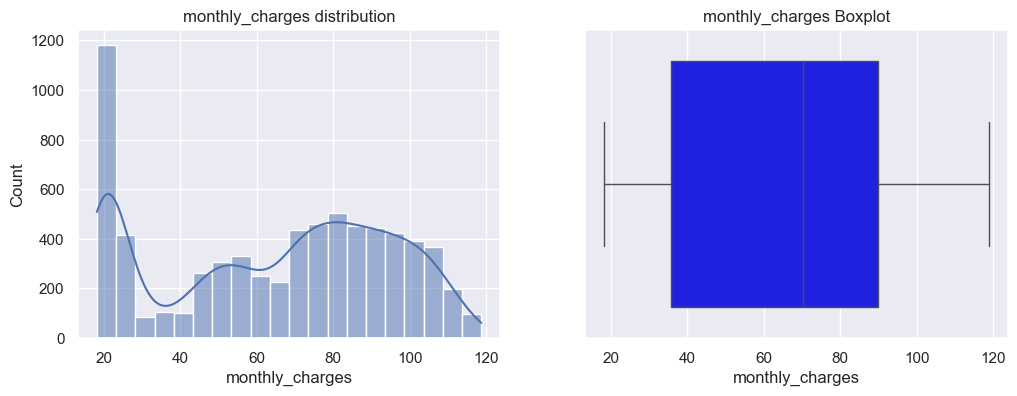

total_charges 
Skew = 0.9616424997242513


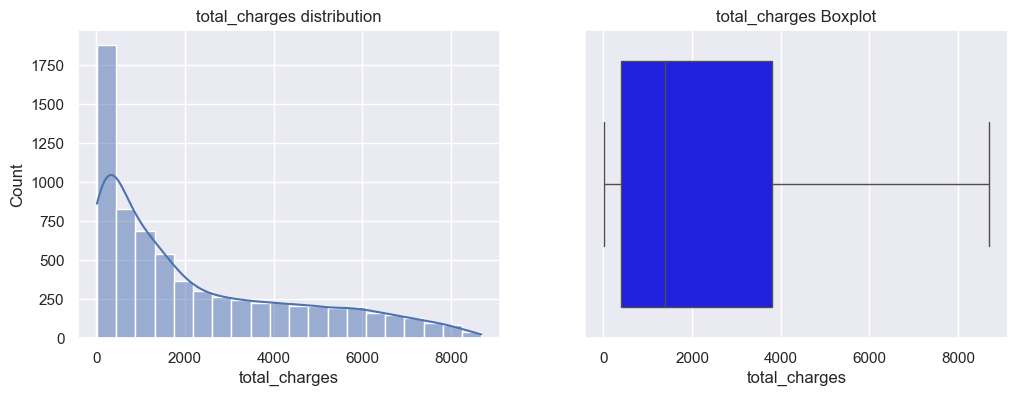

churn_value 
Skew = 1.060621768854348


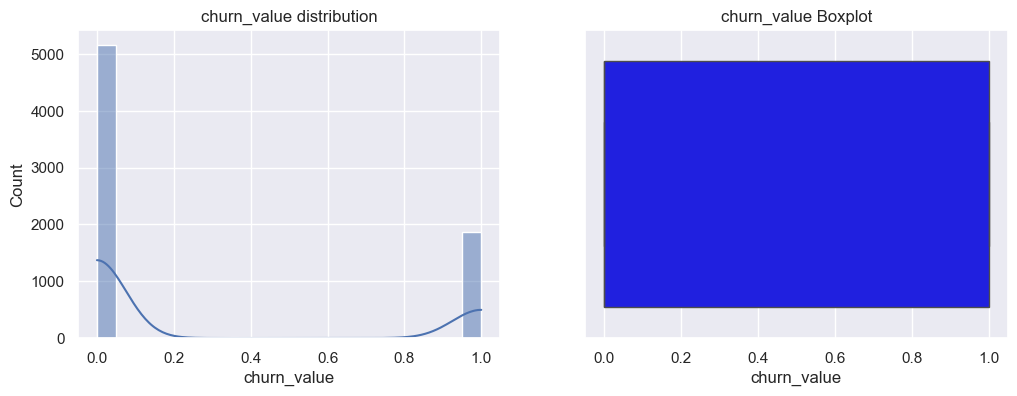

churn_score 
Skew = -0.09107471235065685


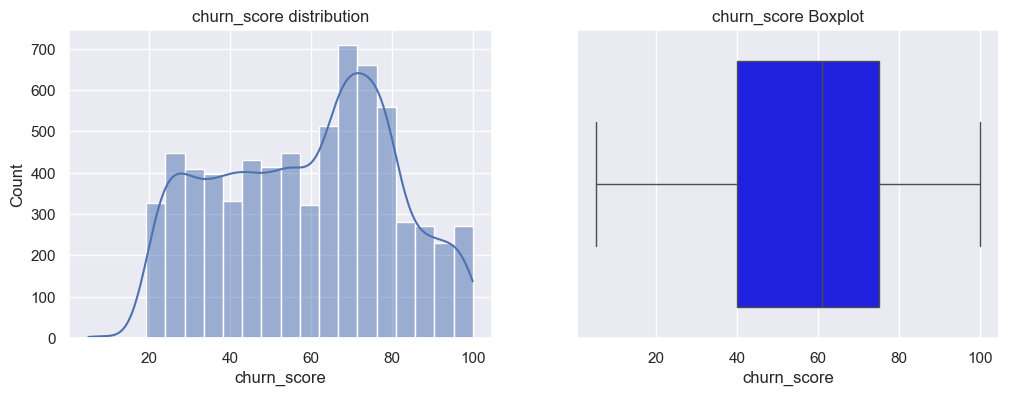

cltv 
Skew = -0.3113273648048447


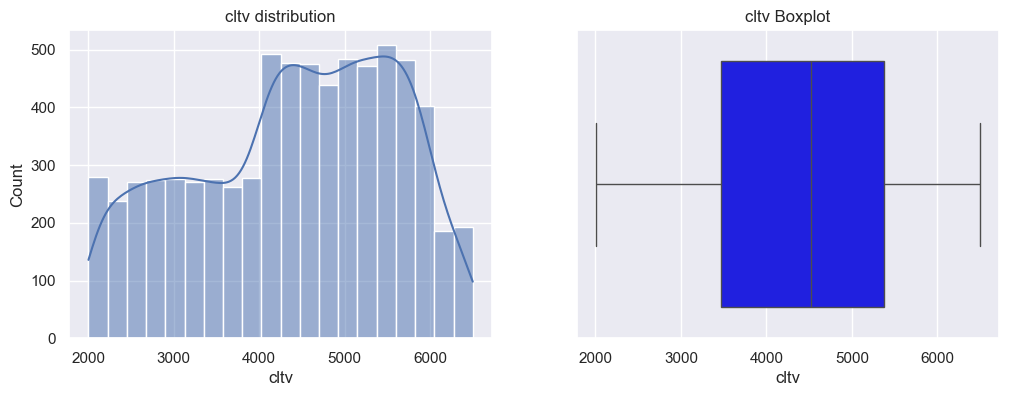

In [40]:
for cols in numerical_columns:
    skewness = customer_churn[cols].skew()
    print(f'{cols} \nSkew = {skewness}')
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    sns.histplot(customer_churn[cols], kde=True, bins=20)
    plt.title(f'{cols} distribution')
    plt.xlabel(cols)
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=customer_churn[cols], color= 'blue')
    plt.title(f'{cols} Boxplot')
    plt.xlabel(cols)
    plt.show()
    plt.show()

### ❖	Churn Correlation:</br>
♦	Use box plots or violin plots to visualize the relationship between numerical features and churn </br>
♦	For categorical features, use stacked bar plots or grouped bar charts to compare churn rates across categories 


In [41]:
numerical_columns

Index(['tenure_months', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

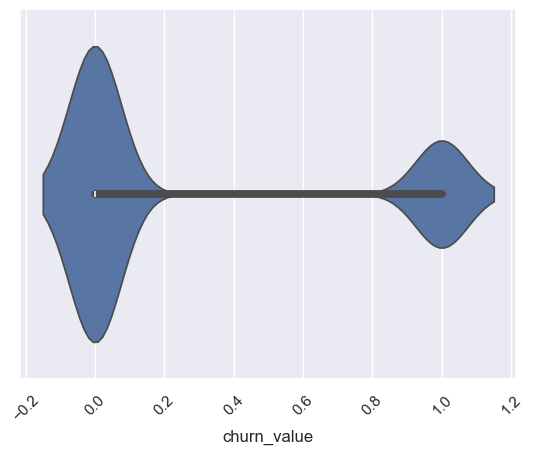

In [42]:
# sns.set_theme(rc={"axes.facecolor":"#e6e6e6",
#             "axes.grid":False,
#             'axes.labelsize':30,
#             'figure.figsize':(5.0, 6.0),
#             'xtick.labelsize':25,
#             'ytick.labelsize':20})


sns.violinplot(data=customer_churn,
               x = 'churn_value')
                #    y = 'Duration',
                #    palette = 'spectral',
            #    order = sorted(customer_churn[numerical_columns]),
            #    notch=True)
plt.xticks(rotation=45)
# l = plt.xlabel('')
# plt.ylabel('Duration (min)')
# plt.text(4.85,200, "Violin Plot", fontsize = 95, color="black", fontstyle='italic')
plt.show

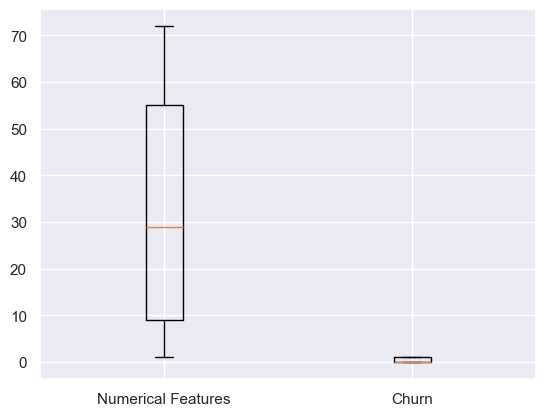

In [43]:
fig, ax = plt.subplots()
ax.boxplot([customer_churn["tenure_months"], customer_churn["churn_value"]])
ax.set_xticklabels(["Numerical Features", "Churn"])
# ax.set_ylabel("col")
plt.show()

In [44]:
# plt.figure(figsize=(13, 17))
# sns.pairplot(data=df.drop(['Kilometers_Driven', 'Price'], axis=1))
# plt.show()

<Axes: xlabel='churn_value'>

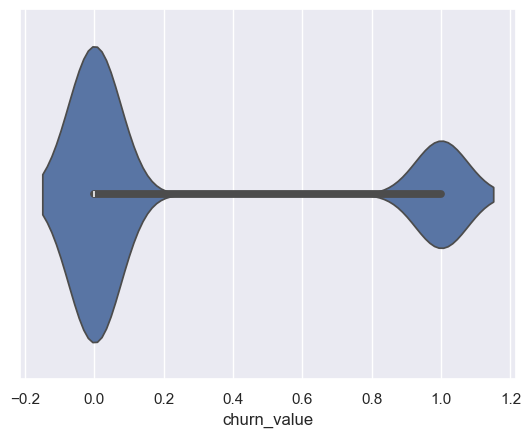

In [45]:
sns.violinplot(customer_churn[categorical_columns], x=customer_churn['churn_value'])

<Axes: xlabel='churn_value'>

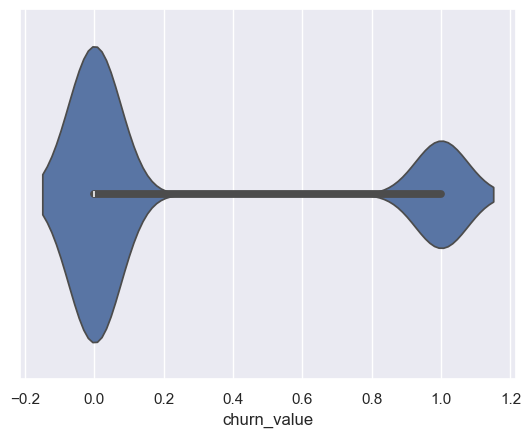

In [46]:
sns.violinplot(customer_churn[categorical_columns], x=customer_churn['churn_value'])

In [47]:
customer_churn[numerical_columns]

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306
7039,24,84.80,1990.50,0,59,2140
7040,72,103.20,7362.90,0,71,5560
7041,11,29.60,346.45,0,59,2793


In [48]:
customer_churn[categorical_columns]

for c in categorical_columns:
    customer_churn[c] = customer_churn[c].str.lower().str.replace(' ', '_')

customer_churn[categorical_columns]
for c in categorical_columns:
    customer_churn[c] = customer_churn[c].str.lower().str.replace('-', '_')

customer_churn[categorical_columns]

,country,state,city,gender,senior_citizen,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,united_states,california,los_angeles,male,no,yes,no,dsl,yes,yes,no,no,no,no,month_to_month,yes,mailed_check
1,united_states,california,los_angeles,female,no,yes,no,fiber_optic,no,no,no,no,no,no,month_to_month,yes,electronic_check
2,united_states,california,los_angeles,female,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month_to_month,yes,electronic_check
3,united_states,california,los_angeles,female,no,yes,yes,fiber_optic,no,no,yes,yes,yes,yes,month_to_month,yes,electronic_check
4,united_states,california,los_angeles,male,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month_to_month,yes,bank_transfer_(automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,united_states,california,landers,female,no,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,bank_transfer_(automatic)
7039,united_states,california,adelanto,male,no,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check
7040,united_states,california,amboy,female,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic)
7041,united_states,california,angelus_oaks,female,no,no,no_phone_service,dsl,yes,no,no,no,no,no,month_to_month,yes,electronic_check


### 4.	Feature Engineering:
o	Analyze categorical and numerical features.</br>
o	Encode categorical features appropriately (One-Hot Encoding, Label Encoding).</br>
o	Create new features, if relevant, based on customer behavior (e.g., average usage time, frequency of interactions).</br>
### 5.	Data Transformation:
o	Normalize or scale features (e.g., MinMaxScaler or StandardScaler) to ensure consistent scales for all numeric features.</br>


In [49]:
X = 

SyntaxError: invalid syntax (1712399413.py, line 1)

In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler